In [1]:
import sympy as sp
import numpy as np
import matplotlib.pylab as plt
sp.init_printing()

# fib Model Code 2010
In the case of monotonic loading, the reference $\tau_{b0}$ value of the bond stresses between concrete and reinforcing bar for pullout and splitting failure can be calculated as a function of the relative displacement $s$ parallel to the bar axis.
\begin{equation}
\tau_{b0} = \tau_{b\, max} \left(\frac{s}{s_1}\right)\,\, \mathrm{for}\,\,0\leq s \leq s_1 \\
\tau_{b0} = \tau_{b\, max} \,\, \mathrm{for}\,\,s_1 \leq s \leq s_2 \\
\tau_{b0} = \tau_{b\, max} - \left( \tau_{b\, max} - \tau_{bf} \left(\frac{s -s_2}{s_3 - s_2}\right) \right) \,\, \mathrm{for}\,\,s_2 \leq s \leq s_3 \\
\tau_{b0} = \tau_{bf} \,\, \mathrm{for}\,\,s_3 < s \\
\end{equation}
The parameters to be applied depend primarily on the failure mode i.e. Pullout or Splitting.
## Pullout
### Good Bond Condition 
\begin{equation}
\tau_{b\,max} = 2.5 \sqrt{f_{cm}} \,;\, s_1  = 1.00 \,;\, s_2 = 2.00 \,;\, s_3 = c_{clear} \,;\, \alpha = 0.4 \,;\, 
\tau_{bf} = 0.4 \tau_{bmax} \\
\end{equation}
### Other Bond Condition
\begin{equation}
\tau_{b\,max} = 1.25 \sqrt{f_{cm}} \,;\, s_1  = 1.8 \,;\, s_2 = 3.6 \,;\, s_3 = c_{clear} \,;\, \alpha = 0.4 \,;\, 
\tau_{bf} = 0.4 \tau_{bmax} \\
\end{equation}

In [8]:
s  = sp.Symbol('s', nonnegative = True)
s_1  = sp.Symbol('s_1', nonnegative = True)
s_2 = sp.Symbol('s_2', nonnegative = True)
s_3 = sp.Symbol('s_3', nonnegative = True)
f_cm = sp.Symbol(r'f_{cm}', nonnegative = True)
alpha = sp.Symbol(r'\alpha', nonnegative = True)

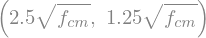

In [9]:
tau_b_max_gc = 2.5 * sp.sqrt(f_cm)
tau_b_max_aoc = 1.25 * sp.sqrt(f_cm)
tau_b_max_gc, tau_b_max_aoc

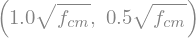

In [10]:
tau_bf_gc = 0.4 * tau_b_max_gc
tau_bf_aoc = 0.4 * tau_b_max_aoc
tau_bf_gc, tau_bf_aoc

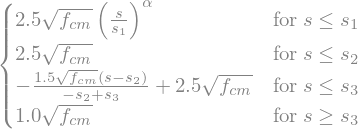

In [26]:
tau_b0_gc = sp.Piecewise(
    (tau_b_max_gc * (s/s_1)**alpha,  s <= s_1),
    (tau_b_max_gc ,  s <= s_2),
    (tau_b_max_gc - ((tau_b_max_gc - tau_bf_gc)*(s - s_2)/(s_3 - s_2) ), s <= s_3),
    (tau_bf_gc, s >= s_3)
)
tau_b0_gc

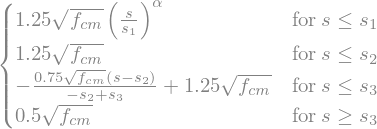

In [25]:
tau_b0_aoc = sp.Piecewise(
    (tau_b_max_aoc * (s/s_1)**alpha,  s <= s_1),
    (tau_b_max_aoc ,  s <= s_2),
    (tau_b_max_aoc - ((tau_b_max_aoc - tau_bf_aoc)*(s - s_2)/(s_3 - s_2) ), s <= s_3),
    (tau_bf_aoc, s >= s_3)
)
tau_b0_aoc

In [27]:
params = {
    f_cm : 3, 
    alpha : 0.4,
    s_1 : 1,
    s_2 : 2,
    s_3 : 4
}

In [28]:
get_tau_b0_gc = sp.lambdify((s), tau_b0_gc.subs(params), 'numpy')
get_tau_b0_gc                      

<function _lambdifygenerated(s)>

No handles with labels found to put in legend.


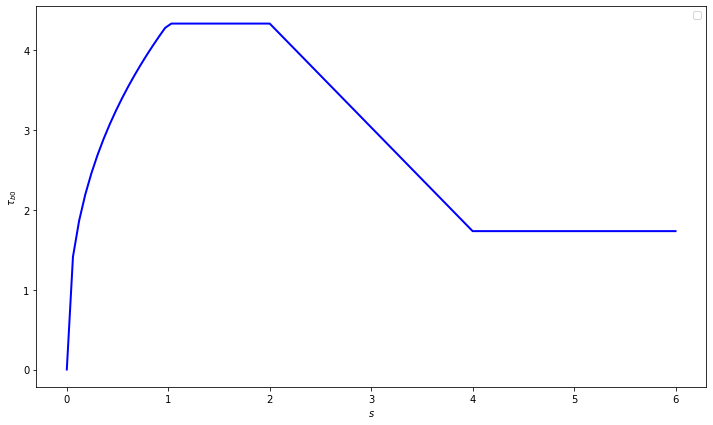

In [33]:
_, (ax1) = plt.subplots(1, 1, figsize=(12,7))
s_ = np.linspace(0, 6, 100)
tau_b0_val1 = get_tau_b0_gc  (s_)
ax1.plot(s_, tau_b0_val1, color='blue', lw=2);
ax1.set_xlabel(r'$s$'); ax1.set_ylabel(r'$\tau_{b0}$')
ax1.legend()

In [34]:
params = {
    f_cm : 3, 
    alpha : 0.4,
    s_1 : 1.8,
    s_2 : 3.6,
    s_3 : 5
}

In [35]:
get_tau_b0_aoc = sp.lambdify((s), tau_b0_aoc.subs(params), 'numpy')
get_tau_b0_aoc

<function _lambdifygenerated(s)>

No handles with labels found to put in legend.


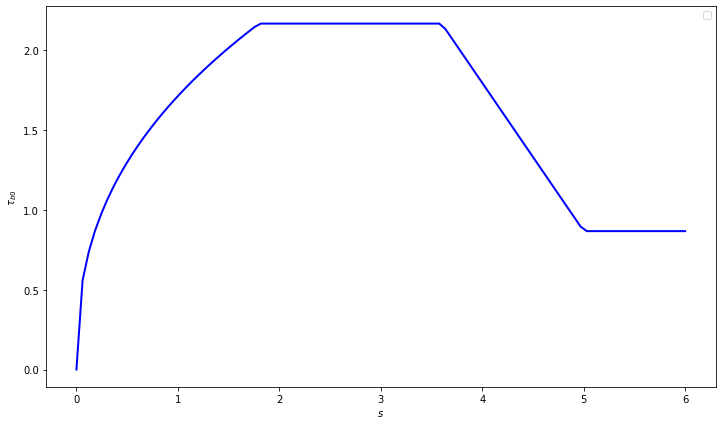

In [37]:
_, (ax1) = plt.subplots(1, 1, figsize=(12,7))
s_ = np.linspace(0, 6, 100)
tau_b0_val2 = get_tau_b0_aoc(s_)
ax1.plot(s_, tau_b0_val2, color='blue', lw=2);
ax1.set_xlabel(r'$s$'); ax1.set_ylabel(r'$\tau_{b0}$')
ax1.legend()

No handles with labels found to put in legend.


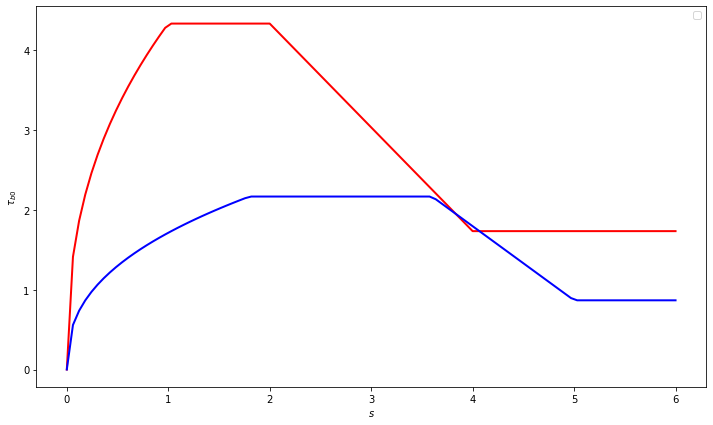

In [38]:
_, (ax1) = plt.subplots(1, 1, figsize=(12,7))
ax1.plot(s_, tau_b0_val1, color='red', lw=2);
ax1.plot(s_, tau_b0_val2, color='blue', lw=2);
ax1.set_xlabel(r'$s$'); ax1.set_ylabel(r'$\tau_{b0}$')
ax1.legend()